In [23]:
import numpy as np
import pandas as pd
df = pd.read_csv("Iris.csv")
pd.set_option("display.max_columns", None) # 全ての列を表示するための設定
print(df.head())                           # 最初の5データのみを表示する

   Species_No  Petal_width  Petal_length  Sepal_width  Sepal_length  \
0           1          0.2           1.4          3.5           5.1   
1           1          0.2           1.4          3.0           4.9   
2           1          0.2           1.3          3.2           4.7   
3           1          0.2           1.5          3.1           4.6   
4           1          0.2           1.4          3.6           5.0   

  Species_name  
0       Setosa  
1       Setosa  
2       Setosa  
3       Setosa  
4       Setosa  


In [24]:
X = df[['Petal_width','Petal_length','Sepal_width','Sepal_length']].copy()
X.head(5)

,Petal_width,Petal_length,Sepal_width,Sepal_length
0,0.2,1.4,3.5,5.1
1,0.2,1.4,3.0,4.9
2,0.2,1.3,3.2,4.7
3,0.2,1.5,3.1,4.6
4,0.2,1.4,3.6,5.0


In [25]:
Y = df['Species_No'].copy()
Y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: Species_No, dtype: int64

[]

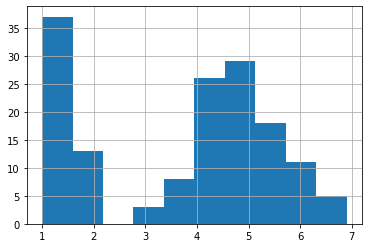

In [26]:
import matplotlib.pyplot as plt 
X["Petal_length"].hist()
plt.plot()

In [27]:
print(X.describe())

       Petal_width  Petal_length  Sepal_width  Sepal_length
count   150.000000    150.000000   150.000000    150.000000
mean      1.199333      3.758000     3.057333      5.843333
std       0.762238      1.765298     0.435866      0.828066
min       0.100000      1.000000     2.000000      4.300000
25%       0.300000      1.600000     2.800000      5.100000
50%       1.300000      4.350000     3.000000      5.800000
75%       1.800000      5.100000     3.300000      6.400000
max       2.500000      6.900000     4.400000      7.900000


In [28]:
print(X["Petal_length"].isna())

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Name: Petal_length, Length: 150, dtype: bool


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,
                                                    test_size=0.2, random_state=0)

In [30]:
from sklearn.tree import DecisionTreeClassifier 

In [31]:
model_full = DecisionTreeClassifier(random_state=0) 

In [32]:
model_full.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=0)

In [41]:
X_train.describe()

,Petal_width,Petal_length,Sepal_width,Sepal_length
count,120.000000,120.000000,120.000000,120.000000
mean,1.231667,3.815833,3.053333,5.880833
std,0.775354,1.784904,0.431907,0.850437
min,0.100000,1.100000,2.000000,4.300000
25%,0.300000,1.600000,2.800000,5.100000
50%,1.300000,4.350000,3.000000,5.800000
75%,1.900000,5.200000,3.300000,6.500000
max,2.500000,6.900000,4.400000,7.900000


In [40]:
X_test.describe()

,Petal_width,Petal_length,Sepal_width,Sepal_length
count,30.000000,30.000000,30.000000,30.000000
mean,1.070000,3.526667,3.073333,5.693333
std,0.704738,1.693789,0.458584,0.725370
min,0.100000,1.000000,2.200000,4.400000
25%,0.325000,1.525000,2.800000,5.000000
50%,1.250000,4.350000,2.900000,5.700000
75%,1.500000,4.700000,3.400000,6.175000
max,2.500000,6.300000,4.200000,7.300000


In [33]:
pred_Y_train = model_full.predict(X_train)
print(pred_Y_train)

[3 2 1 3 3 2 1 2 2 2 3 1 3 1 1 2 3 3 3 3 2 3 2 2 3 3 3 3 2 3 2 1 3 2 2 2 2
 3 1 1 3 2 1 1 2 1 3 2 1 2 3 2 1 3 3 3 3 1 1 3 3 1 3 1 3 3 1 1 3 1 1 1 2 3
 3 1 1 1 2 2 1 1 2 1 3 2 3 2 1 3 1 3 1 1 3 1 3 2 2 2 3 3 2 2 1 2 3 3 1 2 2
 2 2 1 1 1 3 2 3 1]


In [34]:
prediction_result = ( pred_Y_train == Y_train)
print(prediction_result)

137    True
84     True
27     True
127    True
132    True
       ... 
9      True
103    True
67     True
117    True
47     True
Name: Species_No, Length: 120, dtype: bool


In [36]:
np.mean(prediction_result)

1.0

In [35]:
pred_Y_test = model_full.predict(X_test)
prediction_result_test = (pred_Y_test == Y_test)
accuracy_test = np.mean(prediction_result_test)
print("%.1f" % (accuracy_test*100),'%')

100.0 %


In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 

df = pd.read_csv("Iris.csv")
X = df[['Petal_width','Petal_length','Sepal_width','Sepal_length']].copy()
Y = df['Species_No'].copy()
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,
                                                    test_size=0.2, random_state=0)
model = DecisionTreeClassifier(random_state=0) 
model.fit(X_train, Y_train)
pred_Y_train = model.predict(X_train)
#print('pred_Y_train:\t', pred_Y_train)
prediction_result = ( pred_Y_train == Y_train)
#print('prediction_result:\t', prediction_result)
print('Train_accuracy:\t', '%.1f' % (np.mean(prediction_result)*100), '%')

pred_Y_test = model.predict(X_test)
prediction_result_test = (pred_Y_test == Y_test)
accuracy_test = np.mean(prediction_result_test)
print('Test_accuracy:\t', "%.1f" % (accuracy_test*100),'%')

Train_accuracy:	 100.0 %
Test_accuracy:	 100.0 %
